### A case study: Death toll in Puerto Rico from Hurricane Maria ###

Last time we met Rafa Irizarry. He's a statistician at Harvard University in the School of Public Health and the Dana Farber Cancer Institute. 

<img src=https://pbs.twimg.com/profile_images/631957216254423040/aYpkFMFG_400x400.jpg width=200 align=left><BR CLEAR="LEFT"> 

Recall that in September, Rafa began studying the impact of Hurricane Maria on Puerto Rico, specifically attempting to determine the number of people who perished as a result of the storm. He wrote a [blog post on the troubles he had getting access to data](https://simplystatistics.org/2018/09/28/the-complex-process-of-obtaining-puerto-rico-mortality-data-a-timeline/). His timeline is a sad tale of one researcher's struggle to get a clear sense of the damage left by the storm.

We will use his post as a kind of backbone for discussing data, statistics and the ways in which data can help us learn about the world. I want you to notice the creativity that has gone into **finding ways to reveal the toll of Maria on human life.** There is a persistent questioning spirit that is on show in his post. 

This material is available at [http://brwn.co/breakfasts](http://brwn.co/breakfasts).

#### A secnd look ####

Rafa's chronology began with the hurricane. Last time we walked through a number of different ways news organizations used data to try to get a sense of what the death toll might be from the disaster. We left off last time looking at a data set that Rafa "scraped" from a study by researchers at PSU.

In [1]:
load(url("https://github.com/cocteau/breakfasts/raw/master/data/mortality2.Rda"))
mortality2

month,year,deaths
January,2010,2392
February,2010,2227
March,2010,2495
April,2010,2298
May,2010,2449
June,2010,2405
July,2010,2478
August,2010,2575
September,2010,2281
October,2010,2468


We will continue to make use of two packages, both written by [Hadley Wickham](http://hadley.nz/), Chief Scientist at RStudio. The first helps us manipulate tables and is called `dplyr`, and the second makes pretty nice graphics and is called `ggplot2` (the "gg" for [Grammar of Graphics](https://www.amazon.com/Grammar-Graphics-Statistics-Computing/dp/0387245448)). 

To use the new functions Hadley has written you simply use the `library()` command.

In [2]:
library(dplyr)
library(ggplot2)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Tools are added to R in the form of **packages**. A package is simply a bundle of code and data. By authoring packages, people can contribute new functionality to the R language. 

To learn about a package, we can read the documentation provided by its author. [Here is the documentation for dplyr](https://cran.r-project.org/web/packages/dplyr/index.html). It can be a little opaque. Sometimes, however, when people create a package in R, they also write a **vignette** that walks you through how to use the data and commands in the package. That is true for dplyr, and you can read the [vignette for dplyr](https://cran.rstudio.com/web/packages/dplyr/vignettes/introduction.html) after we've run through this brief introduction. 

You can think of R as being driven by "verbs". We have seen `read.csv()`, for example. In making his package, Hadley introduced new verbs into the language. We'll show how to use them in the examples below. In each case, **the functions take a table (a data frame) as input and return another, altered data frame as output.** These functions let you specify subsets, sort on columns, and create new columns. But in each case, you give a table and you get a table.

- `filter()`
- `arrange()`
- `select()`
- `distinct()`
- `mutate()`
- `summarise()`
- `group_by()`
- `sample_n()`

In [3]:
filter(mortality2,year==2016)

month,year,deaths
January,2016,2741
February,2016,2592
March,2016,2460
April,2016,2240
May,2016,2310
June,2016,2354
July,2016,2453
August,2016,2427
September,2016,2363
October,2016,2352


In [4]:
filter(mortality2,month=="September")

month,year,deaths
September,2010,2281
September,2011,2359
September,2012,2454
September,2013,2469
September,2014,2495
September,2015,2258
September,2016,2363


The "==" is called a boolean operator and returns the *logical values* `TRUE` and `FALSE`. And so in our `filter()` command, we are keeping just those rows for which the `month` is `"September"`, say. 

And if we wanted, we could take this smaller table of September's data and create the mean or average number of deaths across every September from 2010 to 2016. Here we take the output of one function, `filter()`, and feed it as the input to another, `summarize()`.

In [5]:
summarize(filter(mortality2,month=="September"),avg_deaths=mean(deaths))

avg_deaths
2382.714


Or instead of filtering by months, we can `group_by()` or "group the data by" `month` and then form our averages.

In [6]:
summarize(group_by(mortality2, month), avg_deaths = mean(deaths))

month,avg_deaths
January,2612.286
February,2375.000
March,2560.143
April,2347.571
May,2404.571
June,2377.429
July,2447.143
August,2460.000
September,2382.714
October,2428.286


For those of you familiar with simple operations in Excel, we are quickly covering much of what you might use a spreadsheet for. What makes coding in R just a teensy bit better than a spreadsheet?

And as a teaser, we take a sequence of commands where the output of one feeds as input to the next and simplify the expressions using pipes. Here the data `mortality2` are passed as input to `groupby()` and the groups are then passed as input to `summarize()`. But now we are in the weeds. 

In [7]:
mortality2 %>%
    group_by(month) %>%
    summarize(avg_deaths = mean(deaths))

month,avg_deaths
January,2612.286
February,2375.000
March,2560.143
April,2347.571
May,2404.571
June,2377.429
July,2447.143
August,2460.000
September,2382.714
October,2428.286


To "see" these data we can use the command `ggplot()` which we will get really good at. It builds up a plot from basic commands, using simple addition to add components like lines and text. Each object you add to a plot will have an *aesthetic* mapping that ties data to the visual properties of the plot. 

Below, we draw several lines where the x-coordinate is `month`, the y-coordinate is `deaths` and we group the data into separate lines, one for each `year`. 

For the point corresponding to September of 2018, we specify particular values and not a data set as we did with the line.

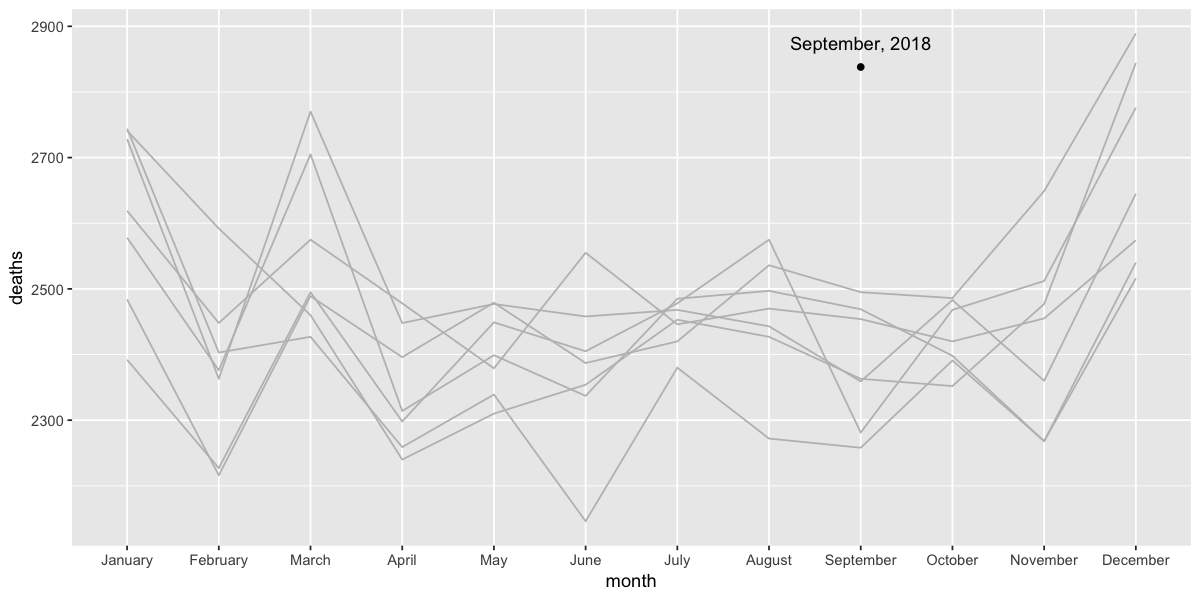

In [8]:
options(repr.plot.width=10, repr.plot.height=5)

ggplot() + 
    geom_line(aes(x=month,y=deaths,group=year),mortality2,color="grey") +
    geom_point(aes(x=9, y=2838), color="black") +
    geom_text(aes(x=9,y=2875),label="September, 2018") 

**Back to PR**

Eventually, the paper is published in the [Journal of the American Medical Association, JAMA.](https://doi.org/10.1001/jama.2018.10929) Here is the important figure from the paper (tidied up by the good people at JAMA).<br><br>

<img src=https://jamanetwork.com/data/Journals/JAMA/0/jld180037f1.png width=500>

<font color="grey">**Dec 05** - We receive data from a Demographic Registry demographer, but it does not include the most important part: the 2017 data. They claim that they “still do not have these data available”.

**Dec 05** - We start finalizing the study design for a survey. Based on the limited information we have, we perform a power calculations and decide to make the sample size as large as our funds permit.</font>

In statistical parlance the "power" of a statistical test is the chance that it will correctly "detect" a difference of a given size. This is a bit out of the scope of our discussion today but we will have a little more to say about it later.

<font color="grey">**Dec 06** - PSU study author replies. But email with data appears to be lost in the mail.

**Dec 07** - Centro de Periodismo Investigative (CPI) publishes an [estimate of excess deaths](http://periodismoinvestigativo.com/2017/12/se-disparan-en-casi-mil-las-muertes-tras-maria/) based on September and October data of about 1,000. It appears they have 2017 data!

<img src=http://periodismoinvestigativo.com/wp-content/uploads/2017/12/Screen-Shot-2017-12-06-at-7.59.31-PM-2.png width=500>

**Dec 07** – From [this tweet,](https://twitter.com/AppDemography/status/938979566282006528) it appears PSU investigator also has the data. I ask on twitter if CPI or PSU investigator have official data.

**Dec 08** – I email PSU investigator asking for data.

**Dec 08** - New York Times published a comprehensive article with very nice data visualization and an estimate of 1,052. They have daily data!</font>

At this point, the official death toll is still 64. The Times received daily mortality data that let them estimate the impact of the hurricane. Again, this is a simple differencing technique where now they compare 2017 deaths to the average of 2016 and 2015, day by day in September and October. They call this difference "excess deaths" and come up with a single number of deaths to date.

[Official Toll in Puerto Rico: 64. Actual Deaths May Be 1,052.](https://www.nytimes.com/interactive/2017/12/08/us/puerto-rico-hurricane-maria-death-toll.html)*
>*A review by The New York Times of daily mortality data from Puerto Rico’s vital statistics bureau indicates a significantly higher death toll after the hurricane than the government there has acknowledged.
<br><br>
The Times’s analysis found that in the 42 days after Hurricane Maria made landfall on Sept. 20 as a Category 4 storm, 1,052 more people than usual died across the island. The analysis compared the number of deaths for each day in 2017 with the average of the number of deaths for the same days in 2015 and 2016.

What do you think of this?

<font color="grey">**Dec 08** – I email first author of New York Times article. She says it took 100 emails/calls to get the data and suggest we contact the Registry director. So now we know the Demographic Registry does in fact have the data.</font>

Data sharing. Editors often have difficulty knowing what to do with data sharing. This has been something that has been fueling so-called "reproducible research" in computational science. There are plenty of reasons not to share data, but the trend seems to be that, when possible and when it poses no harm to sources, we should be sharing data and code. A new startup journalism effort, The Markup, has a very forward looking data ethics statement to look to for an example. [The Markup Ethics Statement](https://themarkup.org/ethics.html)

<font color="grey">**Dec 08** – It appears that the 2017 data does exist and three different groups were given access. We were told, three days earlier, by the Demographic Registry that they “still do not have these data available”. So I email PRIS again to see if they can help.

**Dec 09** – I ask Dr. Buckee to email Registry director to check that it is not just me that is being denied the data.

**Dec 11** - PRIS replies. They give us the name of a Registry demographer that gave data to others. PRIS emails Registry directory, again, on our behalf.

**Dec 13** – The official death count is about \[64\] now and Public Security Secretary dismisses current excess deaths estimates....</font>
<br><br>

<img src=https://pbs.twimg.com/media/DQ7pLJSXkAA6RC1.jpg width=500>
<br><br>

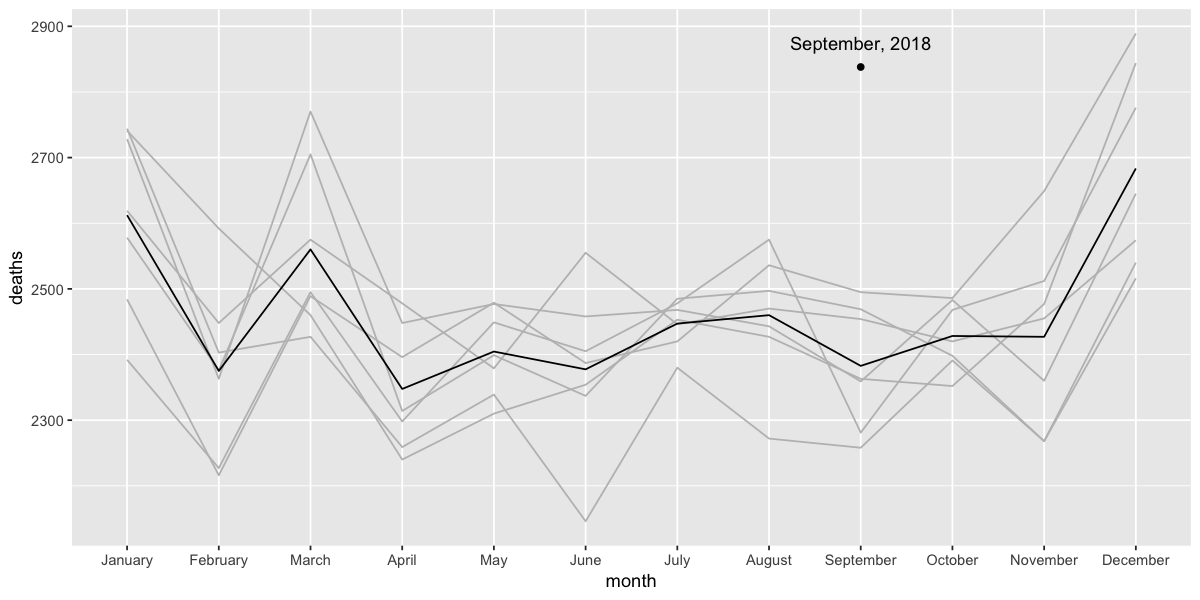

In [9]:
avgs <- summarize(group_by(mortality2,month), average = mean(deaths))

ggplot() + 
    geom_line(aes(x=month,y=deaths,group=year),mortality2,color="grey") +
    geom_point(aes(x=9, y=2838), color="black") +
    geom_text(aes(x=9,y=2875),label="September, 2018") +
    geom_line(aes(x=month,y=average),avgs,group=1)

<font color="grey">**Jan 07** - The New York Times shares the raw data they obtained with us. It’s in PDF! But scrapable. This data shows very clearly that in September and October ther was a huge spike in deaths...</font>

The official data release from Puerto Rico, obtained from the Times, was in the form of a PDF [that Rafa and his team have made available here.](https://github.com/c2-d2/pr_mort_official/raw/master/data/RD-Mortality-Report_2015-18-180531.pdf) That means we need Tabula again to extract the data we need.

This is where the story takes off. So far, we have seen several different kinds of data collection, all aimed at somehow getting around the fact that pieces of the official data record is missing. Each one comes with different "narrative value." As we followed this blog post, we also see Rafa building his own approach. What does he do? Why is his different?

<br>
<img src=https://github.com/cocteau/pr/raw/master/images/aa2.jpg width=600>
<br>

<font color="grey">**Mar 16** - First draft of our survey paper is completed and submitted to the New England Journal of Medicine (NEJM). A particularly troubling finding is the large proportion of deaths attributed to lack of access to medical services. We also see evidence of indirect effects lasting until December 31, the end of the survey period.
<br><br>
**May 04** - Survey paper is tentatively accepted by NEJM.
<br><br>
**May 25** - Official death count is still at 64. We send a draft of our paper to PR governors office.
<br><br>
**May 29** – Our [NEJM](https://www.nejm.org/doi/10.1056/NEJMsa1803972) paper comes out and gets extensive media coverage: 410 outlets including articles in NPR, Washignton Post, New York Times, and CNN. Despite our best efforts, including rewriting our university’s press release, most headlines focus on the point estimate and don’t report uncertainty. All the data and code is made available on GitHub.</font>

Washington Post's headline was "Harvard study estimates thousands died in Puerto Rico because of Hurricane Maria," the New York Times reportes "Puerto Rico’s Hurricane Maria Death Toll Could Exceed 4,000, New Study Estimates," and CNN led with "Hurricane Maria death toll may be more than 4,600 in Puerto Rico." As Rafa points out, none of the headlines underscore the uncertainty in their procedure. Later the Washington Post published a fact check ["Did 4,645 people die in Hurricane Maria? Nope."](https://www.washingtonpost.com/news/fact-checker/wp/2018/06/02/did-4645-people-die-in-hurricane-maria-nope/?utm_term=.66bf2eb3eaac) but misinterprets the measure of uncertainty used. FiveThirtyEight did a nice job, though with its ["Media Reports About The Death Toll In Puerto Rico Are Needlessly Confusing"](https://fivethirtyeight.com/features/media-reports-about-the-death-toll-in-puerto-rico-are-needlessly-confusing/).<br><br>

<img src="https://github.com/c2-d2/pr_mort_official/raw/master/misc/faq_fig.png" width=600><br><br>

<font color="grey">**May 31** - We post an [FAQ (in English and Spanish)](https://github.com/c2-d2/pr_mort_official/blob/master/misc/faq.md) explaining the uncertainty in our estimate and making it clear that our study does not say that 4645 (the point estimate) people died.

**Statistics Interlude**

The death estimates produced by various organizations (news outlets, government offices, academics) we have seen so far are very different in character. Some have been simple arithmetic calculations, others rely on formal statistical procedures. Some, like CNN's telephone census, have an "uncertainty" that is hard to reason around, while the survey technique used by Rafa comes with a specific, statistical notion of the uncertainty in his estimate. 

Rafa makes use of something called a "confidence interval" to assign uncertainty to the estimate of "excess deaths" from the hurricane. A confidence interval is a tool developed in a particular branch of statistics. Statistics, like most fields, can be roughly divided along methodological lines. In statistics, many of the distinctions stem from how you interpret perhaps the most basic of all quantities, probability. *So-called "frequentist statistics" defines probability as the limit of its relative frequency in a large sequence of trials.* 

Let's take a simple example. Suppose we want to know how often a coin, when tossed, will come up heads. You could say 50% because there's no physical reason you can think of why one side would be favored by another. This would be the "classical" interpretation of probability and was first applied to games of chance -- rolling dice, flipping coins, drawing cards. 

The frequentist would instead think about tossing that coin a number of times so that, in the limit, the probability of seeing heads would emerge. Here's a simple experiment. Toss a coin 10 times...

In [10]:
load(url("https://github.com/cocteau/breakfasts/raw/master/data/coin.Rda"))

toss(10)

[1] "T" "H" "T" "T" "H" "H" "H" "H" "T" "H"

... or perhaps 100 times. Then look at the proportion of heads we get. 

In [11]:
toss(100)

[1] "T" "H" "T" "H" "T" "T" "H" "T" "T" "T" "T" "H" "H" "T" "T" "T" "T" "T"
 [19] "H" "T" "T" "H" "H" "H" "H" "H" "T" "H" "H" "H" "T" "H" "H" "T" "H" "H"
 [37] "H" "H" "H" "T" "H" "T" "H" "H" "H" "T" "T" "T" "H" "H" "T" "H" "H" "T"
 [55] "H" "T" "H" "H" "H" "H" "H" "T" "H" "H" "T" "T" "H" "H" "T" "H" "T" "H"
 [73] "H" "T" "H" "T" "T" "T" "H" "H" "T" "T" "H" "H" "T" "T" "H" "H" "H" "T"
 [91] "T" "T" "H" "H" "T" "H" "T" "T" "H" "T"

I've made this easy using a couple of R "functions" I wrote to just toss coins for you (yes, you have to believe me that a computer can do a pretty good job of simulating a fair coin toss). Here we toss 25.

In [12]:
toss_many(25)

n,num_heads,prop_heads
1,1,1.0000000
2,2,1.0000000
3,3,1.0000000
4,4,1.0000000
5,4,0.8000000
6,4,0.6666667
7,4,0.5714286
8,4,0.5000000
9,4,0.4444444
10,4,0.4000000


What's happening as we toss more and more coins? This table doesn't really help us. Let's have a look at a graph instead. 

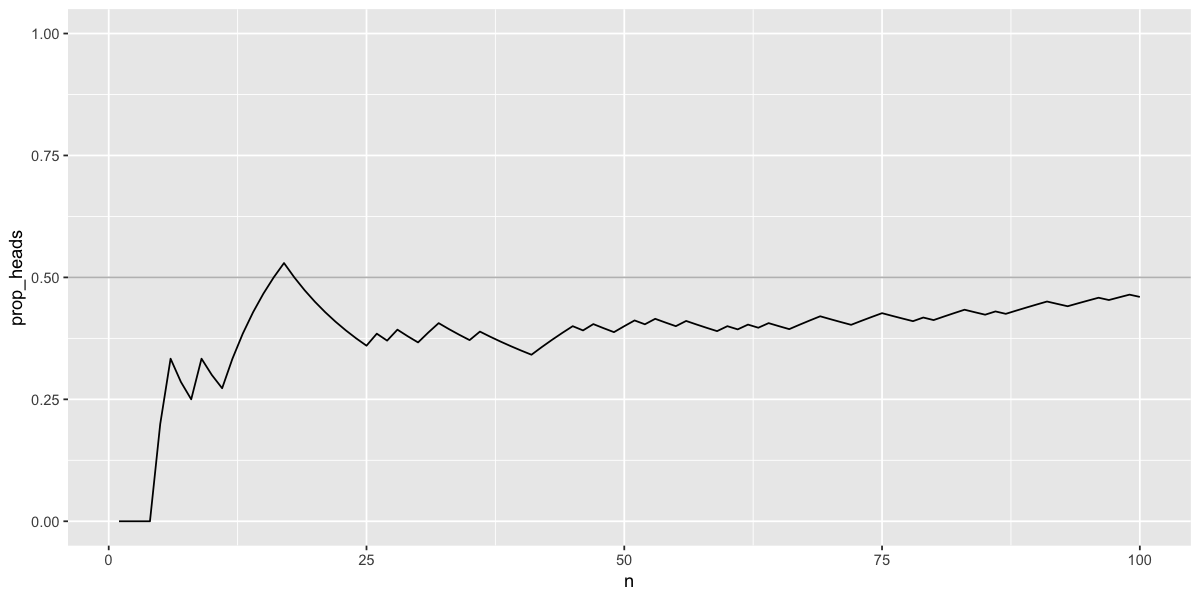

In [13]:
tosses <- toss_many(100)

ggplot()+
    geom_hline(yintercept=0.5,color="grey")+
    geom_line(aes(x=n,y=prop_heads),tosses)+
    ylim(0,1)

See? Over time, the proportion of heads settles down on 50%. In this case we were tossing a fair coin so this is the right answer. What I wanted to show you was that, as a frequentist, you would think about probability as emerging from a sequence of identical trials. The relative frequency that an event occurs in this sequence tends to the probability of the event. Mind you, there are several ways of defining probability -- and you will find statisticians whose methods start with these different definitions. 

Now, let's go back to the excess deaths in Puerto Rico from the hurricane. Rafa is after the number of excess deaths that occured on the island due to the hurricane. Ignoring practicalities for the moment, he could really only get at this number if he interviewed every household in Puerto Rico. This *true value* means talking to the entire population. But, given limited resources, he randomly selected a fraction of the households to visit. The number of excess deaths he computes from this sample is then an *estimate* of the *true value* that he would get if he interviewed everyone. 

Rafa conducted a survey of 3,299 randomly selected households on the island. He asked about each member of the household and whether they had died as a result of the hurricane. [His survey is part of the NEJM supplementary material](https://www.nejm.org/doi/suppl/10.1056/NEJMsa1803972/suppl_file/nejmsa1803972_appendix.pdf). He was then able to produce an estimate of the total excess deaths attributable to the hurricane as 4,645. 
>From the survey data, we estimated a mortality rate of 14.3 deaths (95% confidence interval [CI], 9.8 to 18.9) per 1000 persons from September 20 through December 31, 2017. This rate yielded a total of 4645 excess deaths during this period (95% CI, 793 to 8498), equivalent to a 62% increase in the mortality rate as compared with the same period in 2016. However, this number is likely to be an underestimate because of survivor bias. The mortality rate remained high through the end of December 2017, and one third of the deaths were attributed to delayed or interrupted health care. Hurricane-related migration was substantial.

Associated with this number is an assement of its uncertainty, *a confidence interval*. A confidence interval gives you a sense of the precision of your estimate. For any measure, we need some sense of its precision -- if only to decide if the number we've been quoted is useful to us or not. For example, a monitor that reports your heartrate to within plus or minus 20 beats per minute is not particularly informative, and certainly not useful if we are trying to track our pulse during exercise. Similarly, a tool that can report distances to within five miles might be useful for planning a car trip, but we might think twice about using it before planning a hike.

Now, when given an estimate, a frequentist will express its precision through a confidence interval. Rafa is using a 95% confidence interval. The 95% is referred to as the *confidence level*, and suggests that there is some probability at work here.  And since this is a frequentist tool, that probability comes from a framework where we repeat something. In this case, we imagine Rafa repeating his experiment and randomly selecting 3,299 households again from his list on the island. His estimate of excess deaths will be different as the different households will have lost different numbers of family members. 

So, with a new sample he gets a new estimate and a new interval. Think about Rafa doing this over and over and over. With each new sample of households, he will get a new estimate and a new confidence interval. They will bounce around. Here's a simple simulation.

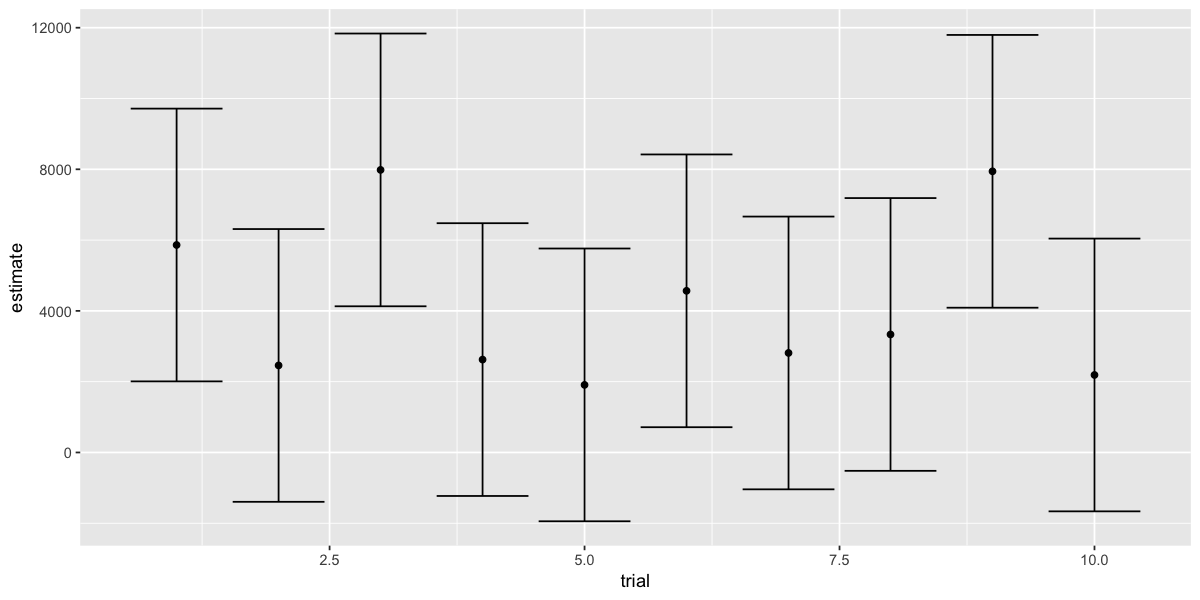

In [14]:
# This code is here just for you to execute - right now there's no reason to understand
# it. Focus on the plot returned.

n <- 10
ed <- data.frame(trial=1:n,estimate=rnorm(n,m=4000,sd=3853/2))
ed <- mutate(ed,cover=factor(c("black","red")[((estimate-3853) > 4500 | (estimate+3853) < 4500)+1]))

ggplot(ed,aes(x=trial,y=estimate))+
    geom_errorbar(aes(ymin=estimate-3853, ymax=estimate+3853))+
    geom_point(aes(x=trial,y=estimate))+
    theme(legend.position="none")

OK, but where does the 95% come in? Think of each survey like the toss of a coin, but this time, instead of heads or tails, the event we are looking for is whether the interval contains the true count of excess deaths or not. Again, this truth would be the number if we were able to talk to everyone on the island. And so, taking a survey, forming an estimate and building a confidence interval is like tossing a coin. Heads, if the interval contains the true value, tails otherwise. 

The 95% means that we have calibrated our intervals so that in 95% of the trials, they will contain this true value. That means 5% of the time, the interval will not contain the true value. If we want to be more sure of ourselves, we could form a 99% interval -- then we would be making a mistake only 1% of the time. The "gotcha" here is that with the extra comfort comes a wider interval -- we could be 100% certain that the number of excess deaths is between 0 and the total population of the island, for example. But that interval is so wide that we haven't learned anything.

Because we are not talking to everyone on the island, we have a degree of uncertainty about how close the estimate we've computed is to the population value. The confidence interval is one way to express that uncertainty. 

Statistics is all about the artful application of randomness so as to be able to learn something about a phenomenon in the world. Here we are using the mechanics of a simple random sample to provide us with a framework for producing informative intervals about the plausible values for our population-level quantity, the true number of excess deaths due to the hurricane. 

Here is our small experiment from above, this time adding the true population value and highlighting which intervals do not contain it.

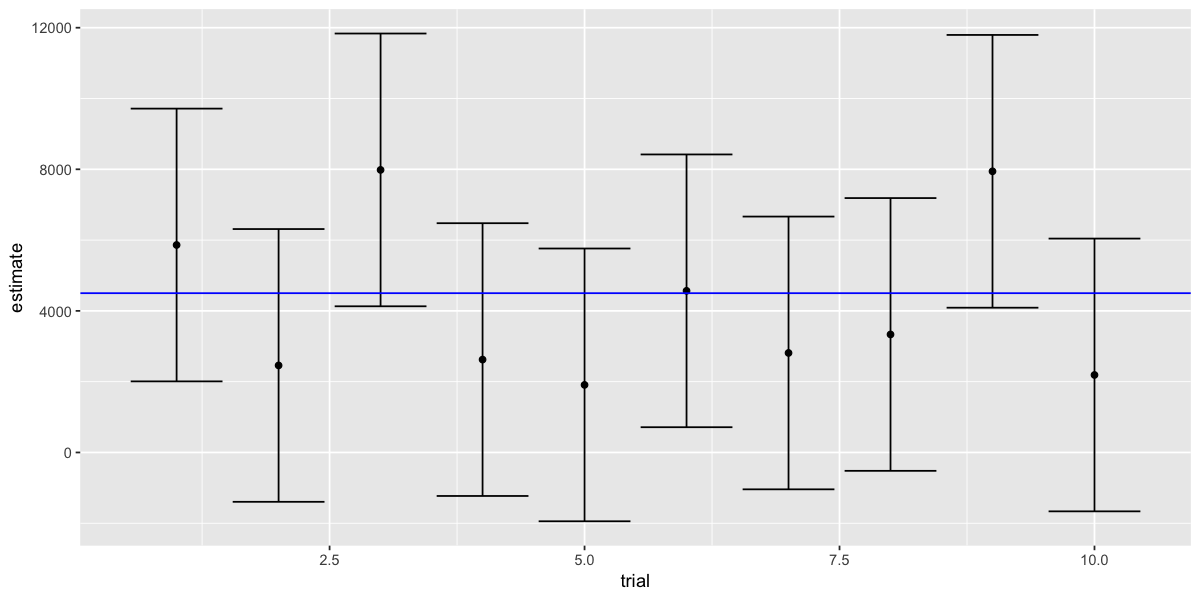

In [15]:
ggplot(ed,aes(x=trial,y=estimate,colour=cover))+
    scale_color_manual("cover", breaks=c(1,2),values=c("#000000", "#FF0000"))+
    geom_errorbar(aes(ymin=estimate-3853, ymax=estimate+3853,color=cover))+
    geom_point(aes(x=trial,y=estimate,color=cover))+
    geom_hline(yintercept=4500,color="blue")+
    theme(legend.position="none")

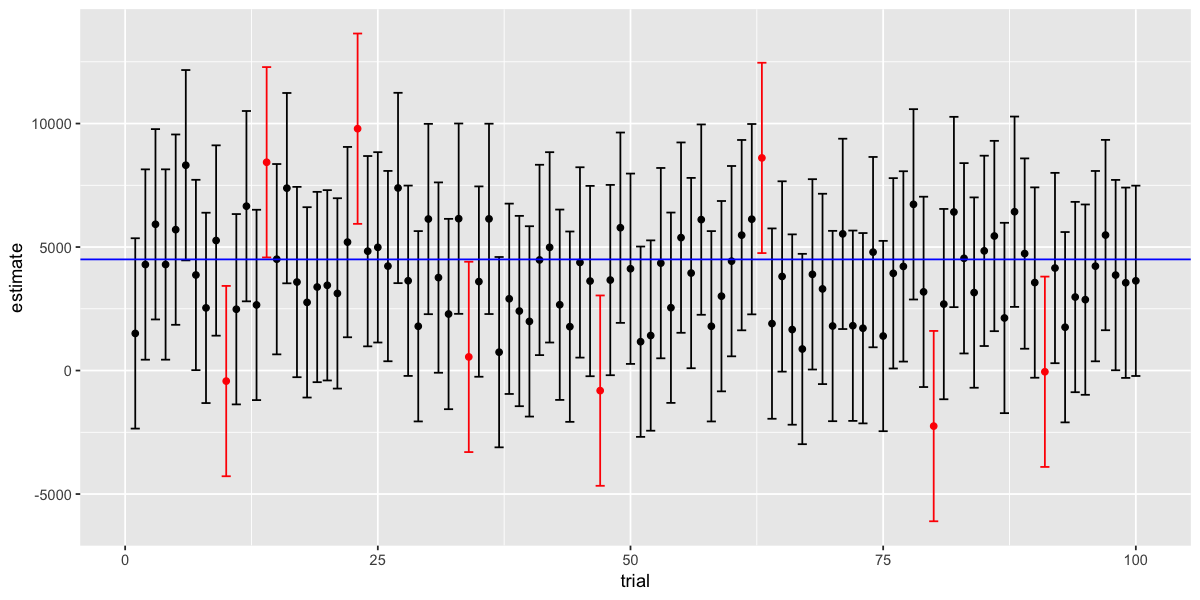

In [16]:
n <- 100
ed <- data.frame(trial=1:n,estimate=rnorm(n,m=4000,sd=3853/2))
ed <- mutate(ed,cover=factor(c("black","red")[((estimate-3853) > 4500 | (estimate+3853) < 4500)+1]))

ggplot(ed,aes(x=trial,y=estimate,colour=cover))+
    scale_color_manual("cover", breaks=c(1,2),values=c("#000000", "#FF0000"))+
    geom_errorbar(aes(ymin=estimate-3853, ymax=estimate+3853,color=cover))+
    geom_point(aes(x=trial,y=estimate,color=cover))+
    geom_hline(yintercept=4500,color="blue")+
    theme(legend.position="none")

The small problem with this confidence interval idea is that it actually can't tell us whether the true value we're after is in a given interval or not. It simply says that the procedure tends to produce intervals that cover the truth 95% of the time. But we could be unlucky, and 1 in 20 times, we will be staring at an interval that does not contain the true value... and won't know it.

The width of a confidence interval depends on the number of data points we are working with (how many households Rafa talked to) and the confidence level (and possibly on the unknown population values as well). In general, the width drops the with more points, but widens as we demand greater confidence. Experimenters will set the confidence level after careful thought ("What kind of error can I tolerate?") or will have it set for them by a publication as a precondition of publication. 

Sample size, on the other hand, is often a tradeoff between how much time and money an experimenter has, and some prior assessment of how narrow they need the intervals to be to detect the effect they are looking for. Remember the example of a heartrate monitor that reported your pulse to within plus or minus 20 beats per minute. If you want to make more refined judgements, you need a narrower interval. This suggests a tradeoff between precision and cost. 

(If you are interested, the concept to follow up on is called *power* and is usually worded in terms of statistical testing.)

**Back to PR**

<font color="grey">**Jun 01** – PR Governor is interviewed by CNN’s Anderson Cooper who grills him on why the government did not share the data. Governor says data was always available and that there will be “hell to pay if data not available”. That afternoon, PR government makes data public. Dr. Buckee requests the data again. This time we get it almost immediately.
<br><br>
**Jan 06** - I post my first analysis with the official mortality data here. The newly released data confirms that the data we were provided earlier were in fact incomplete and that there was a sustained indirect effect lasting past October.
<br><br>
**Aug 27** - GWU study comes out with a preliminary estimate of about 3,000 deaths.
<br><br>
**Sep 05** - Rolando Acosta and I post a preprint describing an analysis of the newly released data including a comparison to the effects of other hurricanes. We also provide a preliminary estimate of about 3,000 deaths due to indirect effects lasting until April.</font>

I will leave it to you to discuss the GWU study and their methodology. What was followed? Is it definitive?

### The official record ###
<img src=http://datos.estadisticas.pr/uploads/group/2018-08-24-155513.166294regdem.jpg width=100 align=left><BR CLEAR="LEFT"> 

Let's leave Rafa's blog for now and consider the status of the official data. It was clearly under tight control. While academics and journalists alike struggled to get a handle on the actual death toll, the need to see the official record was growing. CNN and the Center for Investigative Journalism sued for access to these records and on June 5, 2018, a judge ordered the government to release death certificates. 

[Puerto Rico ordered to release death records](https://www.cnn.com/2018/06/05/us/puerto-rico-hurricane-maria-death-records/index.html)

>The Puerto Rican government has seven days to release death certificates and related data to CNN and a local journalism organization investigating the true toll of Hurricane Maria, a Puerto Rican judge ruled Monday... <br><br>
CNN and the Center for Investigative Journalism (CPI) in Puerto Rico sued for access to death records. Both organizations have published extensive investigations questioning Puerto Rico's official death toll, which is 64.<br><br>
Data about Hurricane Maria deaths has been the Puerto Rican government's "best kept secret," with officials blocking journalists and academics from obtaining basic mortality data, said Carla Minet, executive director of the Center for Investigative Journalism in Puerto Rico.

Perhaps not surprisingly in the 11th hour things stalled.

[Puerto Rico seeks to delay releasing death records after hurricane; judge rejects motion](https://www.cnn.com/2018/06/12/politics/sutter-puerto-rico-records-delay-invs/index.html)
>Puerto Rico Gov. Ricardo Rosselló told CNN last month that there would be "hell to pay" if officials withheld records related to Hurricane Maria.
<br><br>
Yet his government filed a motion late Monday asking for permission **to stall the delivery of death certificates and other data** a judge had ordered to be released to CNN and the Center for Investigative Journalism, or CPI, after the organizations sued for access to those records.<br><br>
In response, the court said it would not lift its requirement that records be released to CNN and CPI by Tuesday.

Eventually, the death certificates were released. Both CNN and CPI made the data available to the public, creating searchable databases. Again, publishing data is a political act. It also has clear ethical dimensions. Compare the way both organizations published their results. 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[CNN: Help CNN investigate hurricane-related deaths in Puerto Rico](https://www.cnn.com/interactive/2018/06/health/puerto-rico-deaths-invs/)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[CPI: Hurricane Maria’s victims](https://hurricanemariasdead.com/database.html)

Tell me about the differences. As an editor, which would you publish? Why? Think back to our discussion about data sharing.

**Having a look at the data**

The Board of Directors for Puerto Rico's Institute of Statistics passed a resolution to make data like these available more readily to the public through their open data portal. 
>To approve the methodology to determine if a death was related to a disaster, so that the
statistics of these deaths are reliable, comparable, and accessible.

You can [read the full resolution](https://estadisticas.pr/files/nosotros/resoluciones/Resolucion_2018-03_EI.pdf) signed April 24, 2018. Evidently, the health department had issues sharing this data, and after CNN's successful suit, Puerto Rico's Institute of Statistics also sued the department for the data. This was June 1, 2018.

[Puerto Rico agency sues government to obtain death data](https://apnews.com/7d19e956de344d7188c79b455c0315f6)

>SAN JUAN, Puerto Rico (AP) — Puerto Rico’s Institute of Statistics announced Friday that it has sued the U.S. territory’s health department and demographic registry seeking to obtain data on the number of deaths following Hurricane Maria as a growing number of critics accuse the government of lacking transparency.
<br><br>
The lawsuit was filed Thursday, the same day Puerto Rico Gov. Ricardo Rossello told CNN there would be “hell to pay” if officials don’t release mortality data. Puerto Rico’s Health Department released some information Friday, saying an additional 1,397 overall deaths were reported from September to December in 2017, compared with the same period the previous year. However, officials did not provide causes of death for any of the 11,459 total people deceased during the period.

Eventually the data appeared and are now being published in what is claimed to be a sustainable way (even if the electricity goes out, we are told). You can visit 
[the open data portal](https://estadisticas.pr/en/media/3176) and see the data they provide about deaths since January 1, 2018. What can you tell me about the data? How is it published? 

https://datos.estadisticas.pr/dataset/defunciones-registradas-hasta-la-semana-pasada

>Deaths registered until last week
File of each death registered in Puerto Rico from January 1, 2017 until last week. Some deaths can be registered weeks, months and even years after they occur, so users should bear in mind that although data from last week are offered, in all probability the deaths that occurred last week are not included: only the deaths that occurred they came to register last week. For each death (row), information is included about causes of death (ICD-10), year and month of death, place of residence, place of birth, type of death, sex, marital status, year of birth, age , level of education, occupation, industry, veteran status, among others. This set of data is prepared to comply with Resolution No. 2018-03 of the Board of Directors of the Institute. <br>\[Google translation\]

For what it's worth, API stands for "Application Programming Interface" and is a popular way for people to expose data. Rather than store data in a single file like a CSV, API's usually let you specify the data you want. They serve data in response to requests. API's became popular in a bygone age of "mash-ups" when the output of one service could be fed into another. This interoperability implied the need to share data, meaning data had to be formatted for machines to easily make sense of it. PDF and HTML are not part of this world as you have to work too hard and it can be a manual process. CSV's are OK. Formats like XML (a sexier version of HTML where the tags denote features of the data) or JSON (Javascript Object Notation) are the typical data formats associated with APIs. And lots of services offer APIs - Twitter, Facebook, YouTube...

You can play with XML, JSON and CSV say using Shan Carter's [Mr. Data Converter](https://shancarter.github.io/mr-data-converter/).

Now, let's read in the mortality data and make some graphs. Make sure to consult the [data dictionary](https://datos.estadisticas.pr/dataset/defunciones-registradas-hasta-la-semana-pasada/resource/5d9b5d1b-d0f8-4155-8a80-b03ff2c2dff9) so you know what each column represents. 

I was having problems reading this file directly into R from the web site. Instead you can download the file and put it in the same folder as this notebook. Then you can read the file from your local disk using the command below.

In [17]:
#ignore - just setting things to work with spanish and to 
#display all 65 columns of the table
loc <- Sys.setlocale('LC_ALL','C')
options(repr.matrix.max.cols=65)

# now read in the data from the official site and have a look
official <- read.csv("regdem-defunciones-01-enero-2017-hasta-noviembre-30-2018.csv")
head(official)

Warning message in file(file, "rt"):
"cannot open file 'regdem-defunciones-01-enero-2017-hasta-noviembre-30-2018.csv': No such file or directory"

ERROR: Error in file(file, "rt"): cannot open the connection


In [ ]:
dim(official)

Given a new data set, I often just want to have a look. This is a back-and-forth process with the data dictionary. What is the variable then what are its values? I usually like to divide data into two types - **quantitative measures** that represent numerical values (like counts or measurements from sensors, say), and then **qualitative measures** that are like categories (like gender or city).  This exercise is useful because it tells you what does and does not make sense to do to the data. 

For example, Zip code. It's qualitative and so it doesn't make sense to take an average of a column of them. When we have categories, the easiest kind of summary statistic is just a frequency display - a table.

In [ ]:
gen <- summarize(group_by(official,Gender),n=n())
gen

In [ ]:
options(repr.plot.width=10, repr.plot.height=5)

ggplot() + geom_bar(aes(x=Gender),official) 

In [ ]:
ggplot() + geom_bar(aes(x=MaritalStatus),official) 

In [ ]:
arrange(summarize(group_by(official,BirthPlace),n=n()),desc(n))

For quantitative variables we also want to look at the shape of the data. There are stories in multiple clusters or modes. There are stories in outlying points. Age is the first quantitative variable in the data set and let's have a look.

In [ ]:
ggplot() + geom_histogram(aes(x=Age),official,bins=50)

In [ ]:
top_n(official,5,Age)

What happened here? 

In [18]:
ggplot() + geom_histogram(aes(x=Age),filter(official,Age<999),col="white",bins=30)

ERROR: Error in filter(official, Age < 999): object 'official' not found


In [19]:
ggplot() + geom_histogram(aes(x=Age),filter(official,Age<999),col="white",bins=10)

ERROR: Error in filter(official, Age < 999): object 'official' not found


A distribution is said to be symmetric if its left and right halves are the same. The mean and standard deviation are well suited for symmetric (and well-behaved) distributions. If, on the other hand, you have skew like this distribution, then the median and IQR might provide  better summaries. In choosing to reduce a data set to one or two numbers, you probably also have to consider the communities of practice around the data you're looking at. We often talk about median home prices because of the skew problem with the mean, for example. So if you were to write about real estate, the summary statistic has been chosen for you. (Not that you shouldn't question how things are done.)

To examine this, let's look more closely at the monthly data. What do you think about December and January in these plots? Look at the 7 numbers for each month. What can you say? To make these observations more quantitative, we might look at the "spread" associated with each month. One measure of spread (we'll talk about this more shortly) is the so-called standard deviation. The average and standard deviation are two summary statistics that are meant to capture the center and spread of the data respectively.

Let's remake our plot, adding an average and then make a plot with the standard deviations. What do you see? Recall that the mean or average of a the numbers for 7 years in our data set is given by

$$\mbox{avg} = \frac{y_1 + y_2 + y_3 + \cdots +y_{n-2} + y_{n-1} + y_n}{n} $$

*While the so-called variance of these numbers is...*

$$\mbox{var} = \frac{(y_1-\mbox{avg})^2 + (y_2-\mbox{avg})^2 + (y_3-\mbox{avg})^2 + \cdots +(y_{n-2}-\mbox{avg})^2 + (y_{n-1}-\mbox{avg})^2 + (y_n-\mbox{avg})^2}{6} $$

... which records how far each point is from the average. You can show that if you consider any other point as the average of a data set, this total distance to that point can't be lower than that of the mean. It's in this sense that we can think of the average as being the "center" of a data set. The variance, then, measures how spread out the data are around the center point, the average. It is common to quote this spread not in terms of the variance but its square root, called the standard deviation.

$$\mbox{sd} = \sqrt{\mbox{var}}$$

Mean and standard deviation measure the center and spread. They work hand in glove with the so-called normal distribution. The "bell curve," it is symmetric and takes on a very specific form. To draw these curves we just need to know the mean and standard deviation -- where is the peak located and how spread out is the bell. Mean and standard deviation are paired with distributions that look like this. If you get data with a different shape, you should consider possibly other summary statistics when telling your story.

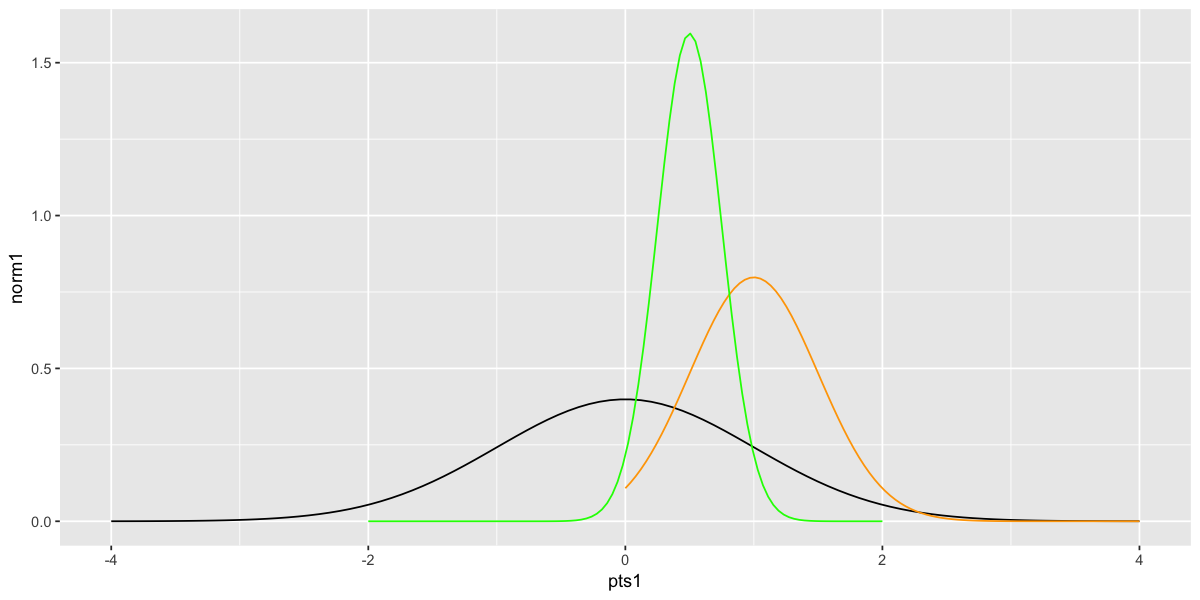

In [20]:
#One normal
pts1 <- seq(-4,4,len=100)
norm1 <- dnorm(pts1)

#Another normal
pts2 <- seq(0,4,len=100)
norm2 <- dnorm(pts2,m=1,sd=0.5)

#Another normal
pts3 <- seq(-2,2,len=100)
norm3 <- dnorm(pts3,m=0.5,sd=0.25)

ggplot()+geom_line(aes(x=pts1,y=norm1))+
    geom_line(aes(x=pts2,y=norm2),color="orange")+
    geom_line(aes(x=pts3,y=norm3),color="green")

Mean and standard deviation are not the only summary statistics that capture the center and spread of a data set. A "robust" pair of alternatives are the mean and so-called inter-quartile range. A mouthful, yes. But when we appeal to these the "center" plot looks about the same, while our view of the variability is somewhat changed.

If you have an odd number of points, the median is literally the point in the middle of the data set. The upper quartile, median and lower quartile divide the data into 4 parts. 25% of the data is below the lower quartile, 25% between the lower and median, 25% between the median and the upper quartile, and 25% above the upper quartile. So the median is brute force measure of the center of a data set and by taking the difference between the upper and lower quartiles, we see how spread out the data are.

In [21]:
summarize(filter(official,Age<999),avg=mean(Age),sd=sd(Age))

ERROR: Error in filter(official, Age < 999): object 'official' not found


In [ ]:
summarize(filter(official,Age<999),lq=quantile(Age,0.25),med=median(Age),uq=quantile(Age,0.75),iqr=IQR(Age))

In [22]:
pts <- seq(35,110,len=500)
norm <- dnorm(pts,m=73.7,sd=17.5)

ggplot() + 
    geom_histogram(aes(x=Age,y = ..density..),filter(official,Age<999),col="white",,bins=30)+ 
    geom_line(aes(x=pts,y=norm))

ERROR: Error in filter(official, Age < 999): object 'official' not found


In [23]:
ggplot() + 
    geom_histogram(aes(x=Age),filter(official,Age<999),col="white",bins=30)+ 
    geom_vline(xintercept=65,color="green")+
    geom_vline(xintercept=86,color="green")+
    geom_vline(xintercept=77,color="red")

ERROR: Error in filter(official, Age < 999): object 'official' not found


Although you will never see one in a publication, the time-tested boxplot incorporates all the "robust" measures we've been talking about - the median and the upper and lower quartiles. They provide a handy thumbnail to compare distributions. 

In [24]:
options(repr.plot.width=2, repr.plot.height=4)

ggplot() + 
    geom_boxplot(aes(x=Gender,y=Age),filter(official,Age<999 & Gender != "U"))

ERROR: Error in filter(official, Age < 999 & Gender != "U"): object 'official' not found


Here are some examples of these displays taken from Rafa's NEJM paper. With his survey, he tried to also study the conditions on the ground that might have caused the high death toll. He examined by "remoteness" (recall the map above) as well as various specific causes that might hinder medical assistance. Qualitative variables summarized with a (horizontal) bar chart and boxplots to compare distributions by remoteness. What do you see?

<img src=https://www.nejm.org/na101/home/literatum/publisher/mms/journals/content/nejm/2018/nejm_2018.379.issue-2/nejmsa1803972/20180716-01/images/img_xlarge/nejmsa1803972_f3.jpeg width=600>

As an alternative, we can "facet" our histogram and divide the picture into two categories - one for males and one for females. This also allows for direct comparisons.

In [25]:
options(repr.plot.width=10, repr.plot.height=5)

ggplot() + 
    geom_histogram(aes(x=Age),filter(official,Age<999 & Gender!="U"),col="white",bins=50) + 
    facet_grid(Gender ~ .)

ERROR: Error in filter(official, Age < 999 & Gender != "U"): object 'official' not found


Having access to the official records seems like a huge win. We now have the records of everyone who died during the time period we're interested in. There is a cause of death denoted "Victim of cataclysmic storm" (the [CDC has a precise definition](https://www.cdc.gov/nchs/data/nvss/vsrg/vsrg01.pdf)) that we can start to work through. CNN's Sutter started there and found a mismatch between the official list of those killed in the storm and those in the records listed as dying from a cataclysmic storm - [Their deaths were labeled 'victim of cataclysmic storm.' So why aren't their names on Puerto Rico's list?](https://www.cnn.com/2018/06/16/health/cataclysmic-storm-deaths-puerto-rico-maria-invs/index.html?no-st=1538964183). In addition, Sutter found out that there are plenty of other causes of death that can be linked to the storm - [Deaths from bacterial disease in Puerto Rico spiked after Maria](https://www.cnn.com/2018/07/03/health/sutter-leptospirosis-outbreak-puerto-rico-invs/index.html). 

At this point we can start to use the codes or even the text of the cause of death to start to assess the actual death toll. It is likely that this number will never be known and at best we can guess at the order of magnitude. My hope by presenting this narrative is that you see that there are many different kinds of data that you can bring to a question, each with thier own peculiarities. The journalism from data is a wildly creative exercise and extends from data collection to analysis.

Now, from here, go read the [GWU study](https://publichealth.gwu.edu/sites/default/files/downloads/projects/PRstudy/Acertainment%20of%20the%20Estimated%20Excess%20Mortality%20from%20Hurricane%20Maria%20in%20Puerto%20Rico.pdf) commissioned by the government of Puerto Rico. What methods were used? What data is available? What kinds of arguments were made?

### On your own###

Finally, if you want to work a little on your own, here is the CDC BRFSS data for Puerto Rico from 2017. Each row is a respondent (we have taken a subsample of 1000), and the variables (columns) are sex, age in 5 year groups, height, weight, a measure of the person's general health, whether they have a health plan, whether they have had difficulty dressing or walking in the last 30 days, their education level, employment status and income. 

Which variables are qualitative? Which are quantitative? 

What hypotheses might we want to investigate with these data?

In [26]:
load(url("https://github.com/cocteau/breakfasts/raw/master/data/cdc.Rda"))
head(cdc)

,Sex,Age5yr,Height,Weight,GenHlth,HlthPln,DiffDress,DiffWalk,Education,Employment,Income
447622,Male,50-54,68,170,Very good,Yes,No,No,College 4 or more years,Employed,NA
449052,Male,35-39,67,175,Excellent,Yes,No,No,College 4 or more years,Employed,<50k
446428,Female,80+,60,102,Fair,Yes,No,Yes,Grade 12,Homemaker,<15k
449604,Male,25-29,71,235,Excellent,Yes,No,No,College 4 or more years,Employed,<50k
448958,Male,25-29,65,160,Good,Yes,No,No,College 4 or more years,Employed,<50k
448931,Male,60-64,67,205,Good,Yes,No,No,College 1-3 years,Employed,<35k
